# Notebook for Personal Key Indicators of Heart Disease

##### Kaggle Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

#### Target is HeartDisease (binary)

In [ ]:
# pip install pandas

In [7]:
import pandas as pd

In [58]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [59]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [60]:
# pip install scikit-learn

import sklearn
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in orig column
df['HeartDisease'] = labelencoder.fit_transform(df['HeartDisease']) # 0 = Negative, 1 = Positive

In [63]:
df[['HeartDisease']].head(7)

,HeartDisease
0,0
1,0
2,0
3,0
4,0
5,1
6,0


In [65]:
y = df[['HeartDisease']] # Setting target

In [11]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.head() # These will be the features to encode

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [67]:
df_obj.drop(columns=['HeartDisease'], inplace=True)

In [68]:
X = pd.get_dummies(df_obj)

In [69]:
X.head()

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,1,1,0,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,1
1,1,0,1,0,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,1,0,1,0
3,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,1,0,1,0,1,0


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
print('Training Rows: ', X_train.shape[0])
print('Testing Rows: ', X_test.shape[0])
print('---------------------------')
print('Number of Columns (Features): ', X_test.shape[1])

Training Rows:  255836
Testing Rows:  63959
---------------------------
Number of Columns (Features):  46


In [81]:
# pip install xgboost
import xgboost
print(xgboost.__version__)

1.5.2


/usr/local/lib/python3.8/dist-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [146]:
# Creating xgboost decision tree

from xgboost import XGBClassifier
model = XGBClassifier(tree_method='gpu_hist', n_estimators=100 ,max_depth=20)

In [147]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python

[06:54:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [148]:
y_hat = model.predict(X_test)

In [149]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_hat)

<AxesSubplot:>

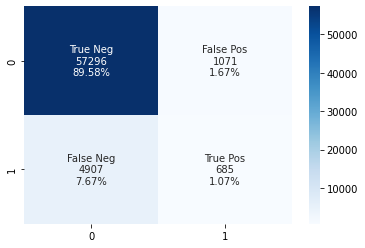

In [150]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)
          
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [151]:
#get RMSE
import math
from sklearn.metrics import mean_squared_error

msegrid =  mean_squared_error(y_test, y_hat)

print('MSE XGBoost:', msegrid)

MSE XGBoost: 0.09346612673744117


In [152]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [153]:
print(tf.__version__)

2.8.0


In [154]:
print("Number of GPU's detected: ", len(tf.config.list_physical_devices('GPU')) )

Number of GPU's detected:  1


2022-04-13 06:56:56.652788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 06:56:56.656122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 06:56:56.656280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [155]:
X_test.shape

(63959, 46)

In [156]:
model_tf = keras.Sequential([
    layers.Dense(128, input_shape=(X_test.shape[1],), activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_tf.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.MeanSquaredError()])

2022-04-13 06:59:09.728876: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-13 06:59:09.729500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 06:59:09.729713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 06:59:09.729800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [157]:
model_tf.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=2)

Epoch 1/10


2022-04-13 07:00:39.822206: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5597/5597 - 9s - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.0650 - val_mean_squared_error: 0.0650 - 9s/epoch - 2ms/step
Epoch 2/10
5597/5597 - 8s - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0652 - val_mean_squared_error: 0.0652 - 8s/epoch - 1ms/step
Epoch 3/10
5597/5597 - 8s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0654 - val_mean_squared_error: 0.0654 - 8s/epoch - 1ms/step
Epoch 4/10
5597/5597 - 8s - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.0649 - val_mean_squared_error: 0.0649 - 8s/epoch - 1ms/step
Epoch 5/10
5597/5597 - 8s - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0651 - val_mean_squared_error: 0.0651 - 8s/epoch - 1ms/step
Epoch 6/10
5597/5597 - 8s - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.0652 - val_mean_squared_error: 0.0652 - 8s/epoch - 1ms/step
Epoch 7/10
5597/5597 - 8s - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0651 - val_mean_squared_error: 0.0651 - 8s/epoch - 1ms/step
Epo